# ADS-DV Week 2 Assignment 2

# Plotting scatter plots and histograms

# Summary
This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas

While reproducible research recommends having your data somewhere where you know it will not change, it may not be feasible to put large datafiles in your portfolio. We will work with a database of information about cities around the world:

https://www.maxmind.com/en/free-world-cities-database

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Data-frames store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

http://pandas.pydata.org/pandas-docs/stable/10min.html

In [1]:
import urllib.request as urllib, zipfile, os

url = 'http://download.maxmind.com/download/worldcities/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [2]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()
try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [3]:
import pandas as pd
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

## Data manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

In [4]:
cities.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876,-20.333333,30.033333


In [5]:
cities.sort(columns='Population', ascending=False).head()

/Users/kees/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378,24.905600,67.082200
1349146,in,new delhi,New Delhi,07,10928270,28.600000,77.200000


By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment A
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


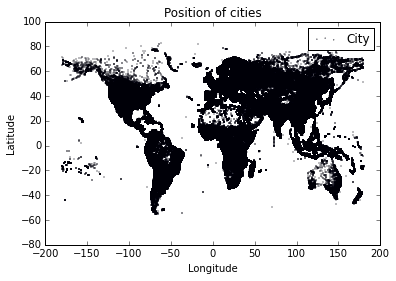

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

plt.figure();
plt.title('Position of cities');
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.scatter(cities['Longitude'], cities['Latitude'], 0.1);
plt.legend(['City']);
plt.show();

## Assignment B

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

/Users/kees/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


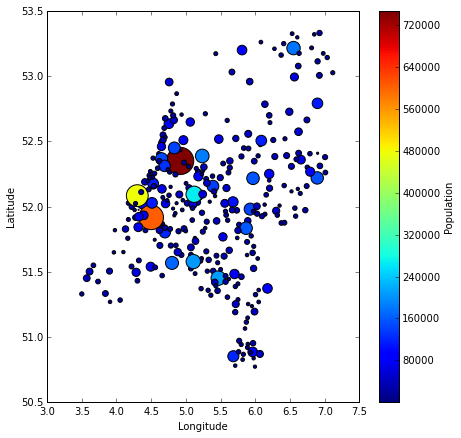

In [7]:
dutch_cities = cities[ cities['Country'] =='nl' ]
plt.figure(figsize=[7,7]);

dutch_area = dutch_cities['Population'] * 0.001;

plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.scatter(dutch_cities['Longitude'], dutch_cities['Latitude'], dutch_area, dutch_cities['Population']);
plt.colorbar().set_label('Population')
plt.show();

## Assignment C

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function?

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

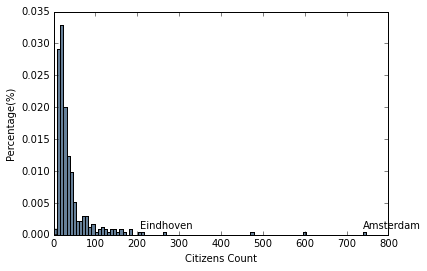

In [19]:
import math

plt.figure();
ax = plt.subplots()
r="j"
x =np.asarray(dutch_cities.dropna().Population/1000)
plt.hist(x, 100, normed=1,color=(.4, .5, .6));
plt.xlabel('Citizens Count')
plt.ylabel('Percentage(%)')
plt.annotate('Amsterdam', xy=(740, 0.001))
plt.annotate('Eindhoven', xy=(210, 0.001))

## Assignment D

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

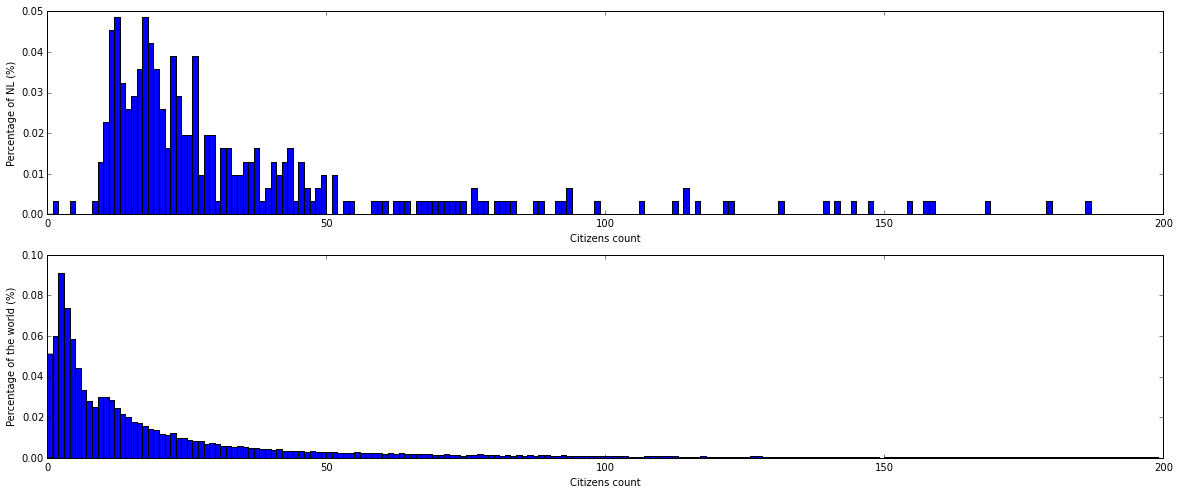

In [20]:
plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1)
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), bins=np.arange(0, 200, 1), normed=1)
plt.xlabel('Citizens count')
plt.ylabel('Percentage of NL (%)')
plt.subplot(2,1,2)
plt.hist(np.asarray(cities.dropna().Population/1000), bins=np.arange(0, 200, 1), normed=1)
plt.xlabel('Citizens count')
plt.ylabel('Percentage of the world (%)');

## Assignment E

Write what conclusions you can deduce from the above plots?

In the Netherlands a higher percentage of the citizens lives in larger cities (urbanization). It's a lot more spread out.